<a href="https://colab.research.google.com/github/nicholasproietti/LGM/blob/main/Light_Curve_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.special import logsumexp

In [ ]:
# range of stellar luminosity 10^(-4)L_sun to 10^6 Lsun

# say we pick a random number from powers of 10 from 1 to 10^10 (in the order of 10^-4)

# generate light signal over time and add small random noise at each time interval
#select a random time and add a big random dip to the light signal for a certain amount of time(representing a planet transit)

In [ ]:
luminosities = []

for i in range(0, 11):
  luminosities.append(10 ** i)
  
luminosities

[1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000,
 10000000000]

In [ ]:
# orbital period of planets range from 10^-1 days to 10^6 days
# most planet transits last from 3 to 5 hrs. Lets say they last from 2 to 6 hrs

In [ ]:
times = np.arange(0, 40, 0.01)
times[:10]
times.shape

(4000,)

In [ ]:
def get_noise_threshold(luminosity):
  index = np.where(luminosities == luminosity)
  return 4 ** index[0]

In [ ]:
# pick a random luminosity
random_luminosity = np.random.choice(luminosities)
print(random_luminosity)
# plot the light signal over time with random noise
noise_threshold = get_noise_threshold(random_luminosity)[0]
print(noise_threshold)
luminosity_over_time = []
for time in times:
  noise = random.uniform(-1 * noise_threshold, noise_threshold)
  luminosity_over_time.append(random_luminosity + noise)

normalized_luminosity = luminosity_over_time / random_luminosity

luminosity_over_time[:10]

100000
1024


[100792.67288786336,
 100221.32342449148,
 100575.73317338359,
 100638.42767094988,
 100821.01845028653,
 99286.83970947703,
 99032.30808543102,
 100861.80699712303,
 100145.89414493601,
 98990.75035661709]

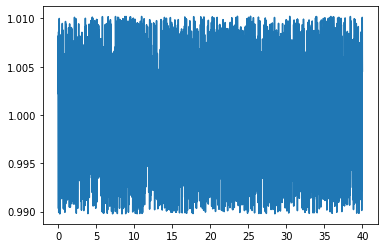

In [ ]:
plt.plot(times, normalized_luminosity)
# plt.ylim([(random_luminosity - noise_threshold) / random_luminosity, (random_luminosity + noise_threshold) / random_luminosity])

In [ ]:
# Plot relative flux on the y axis
# delta(F)/F = (Rp)^2 / (R*)^2

In [ ]:
# parameters needed to calculate transit time
# 1. Radius of the star (R*)
# 2. Radius of the planet (Rp)
# 3. Time Period of the planet (P)
# 4. Semi-major axis of the orbit (a)
# 5. Impact parameter (b)

In [ ]:
# stellar temps range from 3000 K to 30,000 K (consider only main-sequence stars)
temps = []
temp = 4000

while temp <= 30000:
  temp = temp + 10
  temps.append(temp)

In [ ]:
# pick a random temp
random_temp = np.random.randint(4000, 30000)
print(random_temp)
# calculate the radius using L = 4*pi*(R*)^2*sigma*T^4
solar_luminosity = 3.828 * (10 ** 26)
sigma = 5.67 * (10 ** (-8))
luminosity_true = random_luminosity * (10 ** (-4)) * solar_luminosity
star_radius = np.sqrt(luminosity_true / (4 * np.pi * sigma * (random_temp ** 4)))
star_radius

10123


715271678.6581576

In [ ]:
# radii of exoplanets range from 10^6 to 10^8 mts
planet_radius_orders = []
for i in range(0, 3):
  planet_radius_orders.append(10**6 * 10**i)
planet_radius_orders

[1000000, 10000000, 100000000]

In [ ]:
# get random planet radius
random_planet_radius = np.random.randint(1, 10) * np.random.choice(planet_radius_orders)
random_planet_radius

100000000

In [ ]:
# need period and semi-major axis and the impact parameter to calculate transit time
# for now assume the impact parameter is 1 for simplicity
# Period (P) = 2*pi*sqrt(a^3/(GM*))
# L/L_sun = (M/M_sun)^n where 1 < n < 6. n = 3.5 for main sequence stars
solar_mass = 1.98 * (10 ** 30)
print(luminosity_true / solar_luminosity)
star_mass = solar_mass * ((luminosity_true / solar_luminosity) ** (1/3.5))
star_mass

10.0


3.8227815031888353e+30

In [ ]:
# So we can write period in terms of the semi-major axis and the mass of the star
# Semi-major axis of exoplanets range from 0.01 AU to 10 AU
semi_major_axis_orders = []
AU_order = 10 ** 11

for i in range(0, 4):
  semi_major_axis_orders.append(AU_order * (10 ** -2) * (10 ** i))
semi_major_axis_orders

[1000000000.0, 10000000000.0, 100000000000.0, 1000000000000.0]

In [ ]:
# Again pick a random semi-major axis
random_semi_major_axis = np.random.randint(1, 10) * np.random.choice(semi_major_axis_orders)
random_semi_major_axis

5000000000.0

In [ ]:
# period
G = 6.6743 * (10 ** (-11))
P = 2 * np.pi * ((random_semi_major_axis ** 3 / (G * star_mass))** 0.5)
P # in secs

139072.82449915624

In [ ]:
# now we have everything to calculate the transit time
star_radius_and_planet_radius = star_radius + random_planet_radius
impact_parameter = 0
transit_time = (P / np.pi) * np.arcsin(((star_radius_and_planet_radius ** 2 - impact_parameter * star_radius ** 2) ** 0.5) / random_semi_major_axis)

transit_time_hrs = transit_time / 3600
transit_time_hrs

2.014028925653196

In [ ]:
# making some mistake here. have to figure it out
init_time = int(times[-1] / int(transit_time_hrs))
final_time = int(times[-1] - (times[-1] / int(transit_time_hrs)))
init_index = np.where(times == init_time)[0][0]
final_index = np.where(times == final_time)[0][0]
normalized_luminosity[init_index:final_index] = np.multiply(normalized_luminosity[init_index:final_index], ((star_radius ** 2) / (random_planet_radius ** 2)))

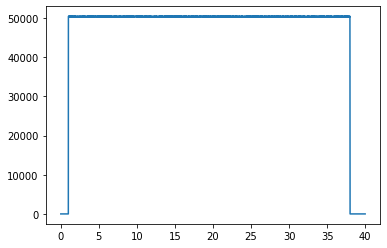